# Mulivariate Linear Regression

Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of
housing prices.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

The ex1 multi.m script has been set up to help you step through this
exercise.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
path = os.getcwd() + '/dataset/ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### Feature Normalization

The value of each independent variable (Size, Bedrooms) is vastly different. This causes the "Size" variable to be weighted too heavily thus would cause the "Bedrooms" variable to be significantly dawrf compared to the size variable. 

To deal with this problem we use "feature normalization".

• Subtract the mean value of each feature from the dataset.

• After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

In [4]:
#panda makes it easy to do this to all rows and column 
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### Gradient Descent

Since our algorithm in simple linear regression use the power of matrix operations we can use the same algorithms to do our calculations

In [5]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2) #compute for each element in X
    return np.sum(inner) / (2 * len(X))

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1]) #ravel returns flatten matrix
    cost = np.zeros(iters)
        
    for i in range(iters):
        error = (X * theta.T) - y
                
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
                
    return theta, cost

In [6]:
# add ones column
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

# convert to matrices and initialize theta
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))

# print first 5 of our matrices
print("X = ",X[:5])
print("Y = ",y[:5])

# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

X =  [[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]
 [ 1.          1.25747602  1.09041654]]
Y =  [[ 0.47574687]
 [-0.08407444]
 [ 0.22862575]
 [-0.86702453]
 [ 1.59538948]]


In [7]:
g, cost = gradientDescent(X, y, theta, alpha, iters)

computeCost(X, y, g)

0.13070336960771892

Nice! Now let's plot the training progress

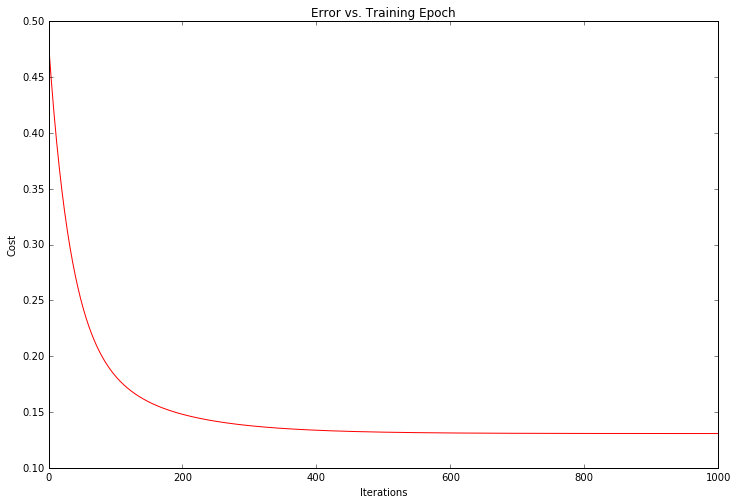

In [8]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

Sources:

http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/ <== for the code